<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/lab8/TransferLearning_Exercise_POKEMON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Clone this repository to bring data to your virtual machine
!git clone https://github.com/sagihaider/CE888_2020.git

Cloning into 'CE888_2020'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 25146 (delta 28), reused 4 (delta 0), pack-reused 25082
Receiving objects: 100% (25146/25146), 561.99 MiB | 36.01 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "jemb90" # username from the json file
os.environ['KAGGLE_KEY'] = "9af8fc1dd77b773fe4e780fb265fcc40" # key from the json file
!kaggle datasets download -d lantian773030/pokemonclassification 

 98% 409M/417M [00:07<00:00, 75.3MB/s]
100% 417M/417M [00:07<00:00, 59.9MB/s]


In [0]:
# Upload data
from zipfile import ZipFile

file_name = "/content/pokemonclassification.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
original_dataset_dir ='/content/PokemonData'
base_dir = '/content/pokemon'
#os.mkdir(base_dir)

In [0]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 73kB/s 
     |████████████████████████████████| 1.6MB 53.6MB/s 
     |████████████████████████████████| 890kB 58.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=3eb02823a188cc057930fb83f8e77114e194f8a7f946513d6ce25bcfa03f309d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.3.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.3.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 1.15.0
    Uninst

In [0]:
import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarn

In [0]:
for f in os.listdir(original_dataset_dir):
  folder=original_dataset_dir+"/"+f
  d=0
  for i in os.listdir(folder):
    os.rename(os.path.join(folder ,i), os.path.join(folder,f+'{}.jpg'.format(d))) 
    d+=1

In [0]:
#Loading the training data
num_classes = 20
PATH = os.getcwd()
# Define data path
data_path = PATH + '/PokemonData'
data_dir_list = os.listdir(data_path)[0:num_classes]
img_data_list=[]
label=[]

l=0
for dataset in data_dir_list:
  if dataset=="Magneton" or dataset=="Venomoth" or dataset=="Cloyster" or dataset=="Scyther" or dataset=="Dewgong" or dataset=="Zapdos":
    continue
  img_list=os.listdir(data_path+'/'+ dataset)
  print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
  for img in img_list:
    img_path = data_path + '/'+ dataset + '/'+ img
    try:
      img = image.load_img(img_path, target_size=(224, 224))
    except:
      continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #x = x/255
    # print('Input image shape:', x.shape)
    img_data_list.append(x)
    label.append(l)
  l+=1

#%% 
img_data = np.array(img_data_list)
label=np.array(label)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)
print(label.shape)

Loaded the images of dataset-Butterfree

Loaded the images of dataset-Farfetchd

Loaded the images of dataset-Meowth

Loaded the images of dataset-Machop

Loaded the images of dataset-Primeape

Loaded the images of dataset-Graveler

Loaded the images of dataset-Dratini

Loaded the images of dataset-Rapidash

Loaded the images of dataset-Poliwag

Loaded the images of dataset-Gengar

Loaded the images of dataset-Spearow

Loaded the images of dataset-Beedrill

Loaded the images of dataset-Machoke

Loaded the images of dataset-Lapras

Loaded the images of dataset-Koffing

Loaded the images of dataset-Ivysaur

Loaded the images of dataset-Starmie

Loaded the images of dataset-Charmander

Loaded the images of dataset-Staryu

Loaded the images of dataset-Cubone

(865, 1, 224, 224, 3)
(1, 865, 224, 224, 3)
(865, 224, 224, 3)
(865,)


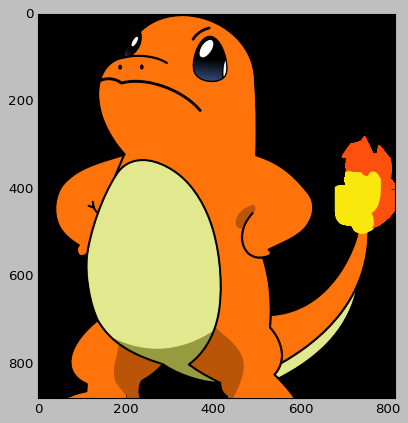

(878, 816, 3)


In [0]:
import cv2
import matplotlib.pyplot as plt
os.listdir('/content/PokemonData/Charmander')
im=cv2.imread('/content/PokemonData/Charmander/Charmander43.jpg')
im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()
print(im.shape)


In [0]:

Y = np_utils.to_categorical(label, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y)

In [0]:
#%% Fine Tuning

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

551927808/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

In [0]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
	layer.trainable = False

custom_vgg_model2.summary()

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)
 
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy  * 100))

Train on 692 samples, validate on 173 samples
Epoch 1/4
692/692 [==============================] - 1238s - loss: 1.3284 - acc: 0.8844 - val_loss: 1.2480 - val_acc: 0.8902
Epoch 2/4
692/692 [==============================] - 1291s - loss: 1.0378 - acc: 0.9249 - val_loss: 1.2994 - val_acc: 0.9075
Epoch 3/4
692/692 [==============================] - 1321s - loss: 0.8880 - acc: 0.9436 - val_loss: 1.2161 - val_acc: 0.9075
Epoch 4/4
692/692 [==============================] - 1321s - loss: 0.8852 - acc: 0.9451 - val_loss: 1.2044 - val_acc: 0.9075
Training time: -5173.55565571785
173/173 [==============================] - 254s   
[INFO] loss=1.2044, accuracy: 90.7514%


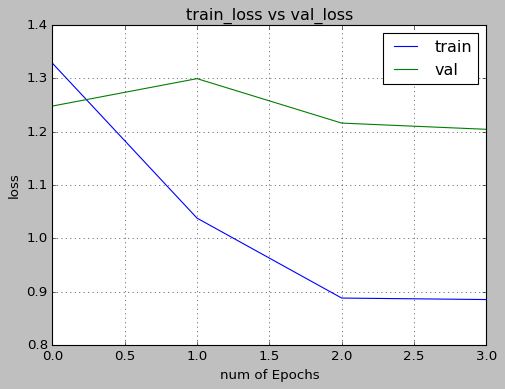

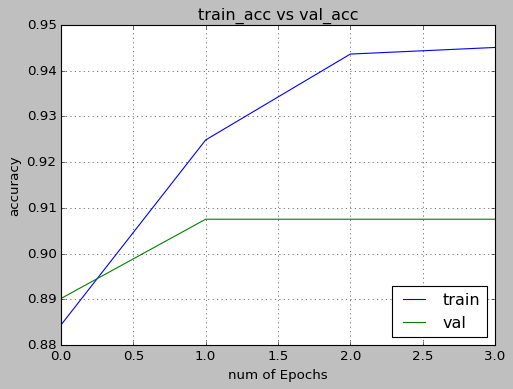

In [0]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(4)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')

plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])